# Lab 3. Genetic Algorithms
# Task 3.2 The 8-Queens Problem
## Problem Descriptions
Describe the problem here...
1.  The Genetic Algorithm to solve this problem -
  *  Encoding Scheme -This is a random permutation of the length of the board(0, 1, 2, 3, 4, 5, 6, 7) to produce a population of fixed length Chromosomes(parents).   
  *  Fitness Function - On a board, no two queen are placed on a board such that they can attack each other.  In other words, no queen shares the same column, diagonal and row.  Therefore a board of 8 x 8 in size maximum fitness = 8.
  *  Genitic Operations - 
    *  Selection - After calculation of fitness function for each member of the population of Chromosomes, a random pair fo chromosomes is choosen for the tournament selection process.  
    *  Crossover function - Two Chromosomes chosen called "parents" to produce a child chrmosome.  Each of the parent chromosome is indexed at a random location  and joined to form a new chromosome of fixed length equal to that of parents in length.  
    *  Mutation - Two random position on the chromosome is indexed and swapped.  
## Implementation and Results

In [1]:
!pip install deap
import random
import numpy as np
from deap import algorithms, base, creator, tools


     |████████████████████████████████| 160 kB 4.5 MB/s 


## Solution to 8-queens problem.

In [3]:
NB_QUEENS = 8

def evalNQueens(individual):

    # create 2 list for the falling diagonal (fd) and the raising diagonal (rd)
    fd = np.zeros(2*NB_QUEENS-1)
    rd = np.zeros(2*NB_QUEENS-1)

    # count the number of queens placed on diagonals fd/rd
    for i in range(NB_QUEENS):
      fd[i+individual[i]] += 1
      rd[NB_QUEENS-1-i+individual[i]] += 1

    # sum the number of queens if more than 1 queen on a diagonal
    return np.sum(fd[fd>1]) + np.sum(rd[rd>1]),
    

In [4]:
# fitness function as the sum of all the distances between each consecutive cities in individual
def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,
    
# enforce only 1 queen per column by using a list of NB_QUEENS
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# enforce only 1 queen per row by using permutation
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)

# register all elements of the GA
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalNQueens)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2.0/NB_QUEENS)
toolbox.register("select", tools.selTournament, tournsize=3)

In [5]:
# run the GA to get the result
random.seed(64)
pop = toolbox.population(n=300)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, verbose=False)
best = tools.selBest(pop, 1)[0]
print("Best: %s. Fitness value: %s" %(best, best.fitness.values[0]))

Best: [5, 3, 1, 7, 4, 6, 0, 2]. Fitness value: 0.0


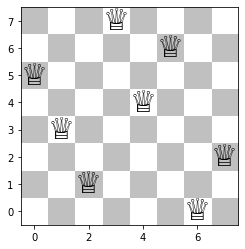

In [6]:
# display the result
import matplotlib.pyplot as plt

chessboard = np.ones((NB_QUEENS, NB_QUEENS))
chessboard[1::2,0::2] = 0.75
chessboard[0::2,1::2] = 0.75
plt.imshow(chessboard, cmap='gray', origin='lower', vmin=0, vmax=1)
for x in range(NB_QUEENS):
    plt.text(x, best[x], '♕', fontsize=30, ha='center', va='center')

## Solution to 12-Queens problem.

In [7]:
NB_QUEENS = 12

def evalNQueens(individual):

    # create 2 list for the falling diagonal (fd) and the raising diagonal (rd)
    fd = np.zeros(2*NB_QUEENS-1)
    rd = np.zeros(2*NB_QUEENS-1)

    # count the number of queens placed on diagonals fd/rd
    for i in range(NB_QUEENS):
      fd[i+individual[i]] += 1
      rd[NB_QUEENS-1-i+individual[i]] += 1

    # sum the number of queens if more than 1 queen on a diagonal
    return np.sum(fd[fd>1]) + np.sum(rd[rd>1]),

In [8]:
# fitness function as the sum of all the distances between each consecutive cities in individual
def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,
    
# enforce only 1 queen per column by using a list of NB_QUEENS
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# enforce only 1 queen per row by using permutation
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)

# register all elements of the GA
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalNQueens)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2.0/NB_QUEENS)
toolbox.register("select", tools.selTournament, tournsize=3)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [9]:
# run the GA to get the result
random.seed(64)
pop = toolbox.population(n=300)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, verbose=False)
best = tools.selBest(pop, 1)[0]
print("Best: %s. Fitness value: %s" %(best, best.fitness.values[0]))

Best: [4, 7, 9, 6, 2, 0, 11, 8, 10, 1, 3, 5]. Fitness value: 0.0


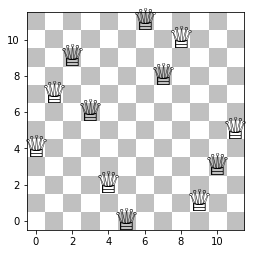

In [10]:
# display the result
import matplotlib.pyplot as plt

chessboard = np.ones((NB_QUEENS, NB_QUEENS))
chessboard[1::2,0::2] = 0.75
chessboard[0::2,1::2] = 0.75
plt.imshow(chessboard, cmap='gray', origin='lower', vmin=0, vmax=1)
for x in range(NB_QUEENS):
    plt.text(x, best[x], '♕', fontsize=30, ha='center', va='center')

## Discussions

In this task, ... We had a in the first case a 8x8 board and in the second case a 12 x 12 board in which to place 8 queens and 12 queens respectively at (x, Y) position such that no queen could attack each other and in the   A Genetic Algorithm was designed in order to solve this problem.  

The Genetic Algorithm had a high quality solution.  In other words, it is providing an optimal solution since the estimated number of queens placed on the board = to the actual amount while meeting all constraints.  This was achieve in very little times(0 second).  Having a well designed fitness function was key to the success of this GA producing an optimal solution.  It also shows that the GA solution workss just fine on any N x N board.     
